In [16]:
# So.
# The goal here is just to test out requests and to test our logistic regression.
# I made a model to do this just by using Match Duration to predict the winner,
# trained on 75 matches and testing on 25 results.
# From the data science side, this approach is trivially innacurate.
# The point is just to get the workflow down.
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
response = requests.get("https://api.opendota.com/api/publicMatches")
df = pd.DataFrame.from_dict(response.json(), orient='columns')
df.head()

,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team
0,7206264718,6058214984,True,1687125437,1031,1576.0,2.0,7,22,35,5,185,"59,80,56,109,31","30,10,120,21,36"
1,7206264417,6058209304,True,1687125412,531,NaN,NaN,0,22,33,2,154,"137,34,44,90,30","91,71,114,26,94"
2,7206262013,6058212353,True,1687125221,1015,NaN,NaN,7,22,32,3,182,"22,80,27,61,97","26,109,14,35,20"
3,7206261901,6058216236,True,1687125216,1335,NaN,NaN,0,22,51,7,202,"97,95,48,88,135","32,82,128,84,87"
4,7206261216,6058216638,True,1687125161,1474,NaN,NaN,0,4,41,3,185,"101,55,105,21,44","74,32,28,33,121"


In [11]:
df.set_index(['match_id'], inplace=True)
df.drop(['match_seq_num','start_time','avg_mmr','num_mmr','lobby_type','game_mode','avg_rank_tier','num_rank_tier','cluster','radiant_team','dire_team'],axis=1,inplace=True)
df.head()

,radiant_win,duration
match_id,,
7206264718,True,1031
7206264417,True,531
7206262013,True,1015
7206261901,True,1335
7206261216,True,1474


In [14]:
df['radiant_win2'] = [1 if x == True else 0 for x in df['radiant_win']]
df.head()

,radiant_win,duration,radiant_win2
match_id,,,
7206264718,True,1031,1
7206264417,True,531,1
7206262013,True,1015,1
7206261901,True,1335,1
7206261216,True,1474,1


In [15]:
df.drop(['radiant_win'],axis=1, inplace=True)
df.head()

,duration,radiant_win2
match_id,,
7206264718,1031,1
7206264417,531,1
7206262013,1015,1
7206261901,1335,1
7206261216,1474,1


<AxesSubplot:>

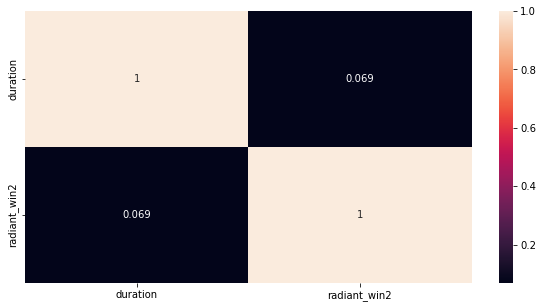

In [17]:
# feature selection
plt.figure(figsize=(10,5))
feature_correlation = df.corr()
sns.heatmap(feature_correlation, annot=True)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df[['duration']].to_numpy(), \
     df['radiant_win2'].to_numpy(), train_size=.75)

In [19]:
model = LogisticRegression(solver='saga')
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

<AxesSubplot:>

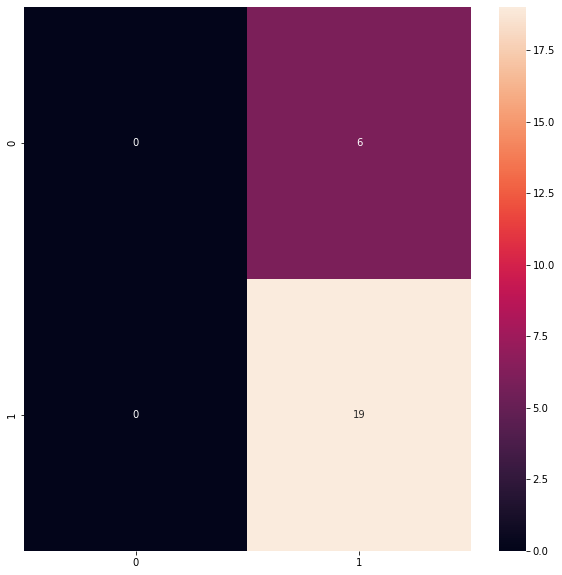

In [20]:
c_matrix = metrics.confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,10))
sns.heatmap(c_matrix,annot=True)

In [21]:
accuracy = metrics.accuracy_score(y_test,y_predicted)
print(accuracy)

0.76


In [25]:
# End-to-End, this is good so far. Will need more data on the match
response2 = requests.get("https://api.opendota.com/api/matches/7206264718")
response2.json()

{'match_id': 7206264718,
 'barracks_status_dire': 0,
 'barracks_status_radiant': 63,
 'chat': None,
 'cluster': 185,
 'cosmetics': None,
 'dire_score': 8,
 'dire_team_id': None,
 'draft_timings': None,
 'duration': 1031,
 'engine': 1,
 'first_blood_time': 58,
 'game_mode': 22,
 'human_players': 10,
 'leagueid': 0,
 'lobby_type': 7,
 'match_seq_num': 6058214984,
 'negative_votes': 0,
 'objectives': None,
 'picks_bans': [{'is_pick': True, 'hero_id': 36, 'team': 1, 'order': 0},
  {'is_pick': True, 'hero_id': 56, 'team': 0, 'order': 1},
  {'is_pick': True, 'hero_id': 120, 'team': 1, 'order': 2},
  {'is_pick': True, 'hero_id': 31, 'team': 0, 'order': 3},
  {'is_pick': True, 'hero_id': 59, 'team': 0, 'order': 4},
  {'is_pick': True, 'hero_id': 30, 'team': 1, 'order': 5},
  {'is_pick': True, 'hero_id': 80, 'team': 0, 'order': 6},
  {'is_pick': True, 'hero_id': 10, 'team': 1, 'order': 7},
  {'is_pick': True, 'hero_id': 21, 'team': 1, 'order': 8},
  {'is_pick': True, 'hero_id': 109, 'team': 0, 

In [32]:
response2.json().keys()

dict_keys(['match_id', 'barracks_status_dire', 'barracks_status_radiant', 'chat', 'cluster', 'cosmetics', 'dire_score', 'dire_team_id', 'draft_timings', 'duration', 'engine', 'first_blood_time', 'game_mode', 'human_players', 'leagueid', 'lobby_type', 'match_seq_num', 'negative_votes', 'objectives', 'picks_bans', 'positive_votes', 'radiant_gold_adv', 'radiant_score', 'radiant_team_id', 'radiant_win', 'radiant_xp_adv', 'skill', 'start_time', 'teamfights', 'tower_status_dire', 'tower_status_radiant', 'version', 'replay_salt', 'series_id', 'series_type', 'players', 'patch', 'region', 'replay_url'])

In [41]:
response2.json()['players'][0]['account_id']

416336446

In [ ]:
#need player details as well for MMR etc.
response3 = requests.get("https://api.opendota.com/api/players/416336446")
response3.json()

In [ ]:
# There's the MMR and also the Rank Tier above. Will take some work to get 100 matches, then 100 match results, then 10 players per match result to get all MMRs and rank tiers.
